# Import libraries

In [31]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Get datasets

In [2]:
def getdf(link):
  req = requests.get(link).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))

# Administrative Boundaries

#### CAN_AL2_Canada.json dataset (Canada)

In [20]:
can_country = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/CAN/CAN_AL2_Canada.json'
can_country_df = getdf(can_ct)

In [21]:
can_country_df

,geometry


****** not sure what happens here ******

#### CAN_AL2_Canada_GEZ.json dataset (Canada)

In [3]:
can = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/CAN/CAN_AL2_Canada_GEZ.json'
can_df = getdf(can)

In [4]:
can_df.shape

(3, 8)

In [5]:
can_df

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,CAN,,Canada,Boreal coniferous forest,41,Ba,2,"MULTIPOLYGON (((306.59826 46.71342, 306.59850 ..."
1,CAN,,Canada,Boreal mountain system,43,BM,2,"MULTIPOLYGON (((229.51665 54.82880, 229.51665 ..."
2,CAN,,Canada,Boreal tundra woodland,42,Bb,2,"MULTIPOLYGON (((281.16608 51.14961, 281.16526 ..."


In [7]:
can_df = can_df.drop('ISO3166_2', axis=1)
can_df = can_df.drop('adminlevel', axis=1)
can_df

,country,name,gez_name,gez_code,gez_abbrev,geometry
0,CAN,Canada,Boreal coniferous forest,41,Ba,"MULTIPOLYGON (((306.59826 46.71342, 306.59850 ..."
1,CAN,Canada,Boreal mountain system,43,BM,"MULTIPOLYGON (((229.51665 54.82880, 229.51665 ..."
2,CAN,Canada,Boreal tundra woodland,42,Bb,"MULTIPOLYGON (((281.16608 51.14961, 281.16526 ..."


In [9]:
canada_df=can_df.copy()
canada_df=canada_df[['name', 'geometry']]
canada_df

,name,geometry
0,Canada,"MULTIPOLYGON (((306.59826 46.71342, 306.59850 ..."
1,Canada,"MULTIPOLYGON (((229.51665 54.82880, 229.51665 ..."
2,Canada,"MULTIPOLYGON (((281.16608 51.14961, 281.16526 ..."


In [12]:
can_df.to_csv('can.csv')
canada_df.to_csv('canada.csv')

#### USA_AL2_United States_GEZ.json dataset (United States)

In [11]:
usa = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/USA/USA_AL2_United States_GEZ.json'
usa_df = getdf(usa)

In [13]:
usa_df.shape

(5, 8)

In [14]:
usa_df

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,USA,,United States,Boreal mountain system,43,BM,2,"MULTIPOLYGON (((229.40567 54.79152, 229.40578 ..."
1,USA,,United States,Boreal tundra woodland,42,Bb,2,"MULTIPOLYGON (((205.68254 59.77864, 205.68253 ..."
2,USA,,United States,Polar,50,P,2,"MULTIPOLYGON (((180.92142 51.28453, 180.92071 ..."
3,USA,,United States,Subtropical desert,24,SBWh,2,"POLYGON ((245.56067 37.35094, 245.55847 37.351..."
4,USA,,United States,Subtropical dry forest,22,SCs,2,"MULTIPOLYGON (((238.19459 38.01701, 238.19519 ..."


In [15]:
usa_df = usa_df.drop('ISO3166_2', axis=1)
usa_df = usa_df.drop('adminlevel', axis=1)
usa_df

,country,name,gez_name,gez_code,gez_abbrev,geometry
0,USA,United States,Boreal mountain system,43,BM,"MULTIPOLYGON (((229.40567 54.79152, 229.40578 ..."
1,USA,United States,Boreal tundra woodland,42,Bb,"MULTIPOLYGON (((205.68254 59.77864, 205.68253 ..."
2,USA,United States,Polar,50,P,"MULTIPOLYGON (((180.92142 51.28453, 180.92071 ..."
3,USA,United States,Subtropical desert,24,SBWh,"POLYGON ((245.56067 37.35094, 245.55847 37.351..."
4,USA,United States,Subtropical dry forest,22,SCs,"MULTIPOLYGON (((238.19459 38.01701, 238.19519 ..."


In [16]:
ustates_df=usa_df.copy()
ustates_df=ustates_df[['name', 'geometry']]
ustates_df

,name,geometry
0,United States,"MULTIPOLYGON (((229.40567 54.79152, 229.40578 ..."
1,United States,"MULTIPOLYGON (((205.68254 59.77864, 205.68253 ..."
2,United States,"MULTIPOLYGON (((180.92142 51.28453, 180.92071 ..."
3,United States,"POLYGON ((245.56067 37.35094, 245.55847 37.351..."
4,United States,"MULTIPOLYGON (((238.19459 38.01701, 238.19519 ..."


In [18]:
usa_df.to_csv('usa.csv')
ustates_df.to_csv('ustates.csv')

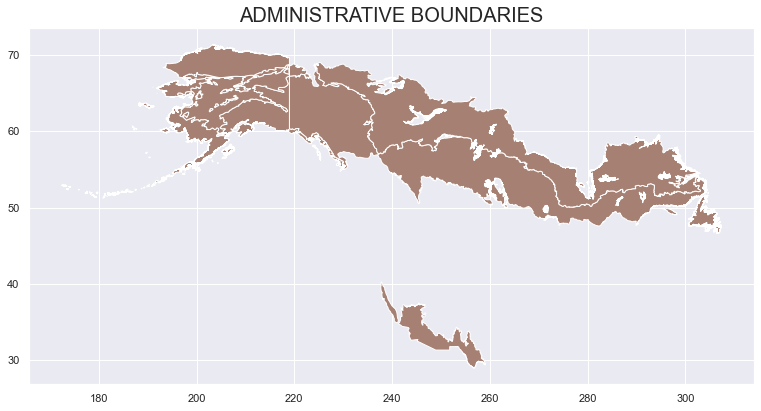

In [35]:
boundaries_df = pd.concat([canada_df, ustates_df], axis=0)

fig, ax = plt.subplots(1, 1, figsize=(13, 10))
ax.set_title('ADMINISTRATIVE BOUNDARIES', fontsize=20)
boundaries_df.plot(ax=ax, color = '#A68072')
plt.show()